In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%run modeling.py


Model r^2: 0.820 train, 0.814 test
Model MSE: 0.294 train, 0.310 test

Model r^2: 0.810 train, 0.797 test
Model MSE: 0.318 train, 0.336 test

Model r^2: 0.806 train, 0.794 test
Model MSE: 0.299 train, 0.312 test

Items assigned to "test" on all models: 457
Matched test items, r^2: 0.782, 0.776, 0.784
Matched test items, MSE: 0.307, 0.315, 0.304


In [4]:
data = pd.read_csv(os.path.join('Data', 'Price_event_modeling.csv'))

In [5]:
data

,Itemname,Effectnum,Time_weight,Value_ln,Value_ln_pred,TrTest,Value_ln_pred_v2,TrTest_v2,Value_ln_pred_v3,TrTest_v3
0,Whoopee Cap,34,0.197598,2.548388,3.108701,tr,3.153334,tr,NaN,NaN
1,Halogen Head Lamp,35,0.835528,2.953853,2.853081,tr,2.883013,tr,2.905280,tr
2,Mighty Mitre,160,0.296589,4.230147,4.054564,tr,4.072725,tr,4.160079,tr
3,Napoleon Complex,89,0.927526,4.546484,4.688889,tr,4.707169,test,4.725339,test
4,Snowcapped,29,0.323451,3.548564,3.602814,tr,NaN,NaN,3.582302,tr
...,...,...,...,...,...,...,...,...,...,...
39247,Coffin Kit,31,0.121911,7.376702,6.273012,test,6.380434,tr,6.902299,test
39248,Dread Hiding Hood,57,0.566275,3.808494,3.894338,test,NaN,NaN,3.813000,tr
39249,Airdog,58,0.820320,2.866842,2.882876,test,2.864087,tr,2.911692,tr
39250,Trucker's Topper,32,0.700707,3.108004,2.996915,test,2.901891,tr,2.967844,test


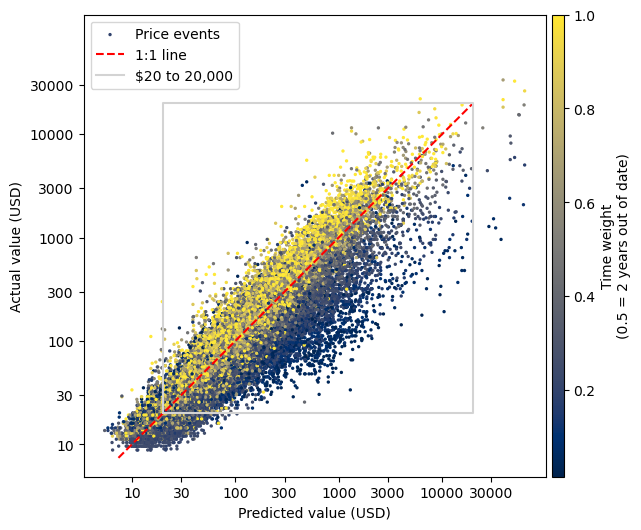

In [6]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes()

# Generate scatter plot (time weight is random spread, so stacking should be fine)
scatter = ax.scatter(data['Value_ln_pred'], data['Value_ln'],
                     c=data['Time_weight'],
                     # s=3*data['Time_weight'],
                     s=2,
                     cmap='cividis',
                     # alpha=0.5
                     )
vs1 = np.log(20)
vs2 = np.log(20000)
ax.plot([2, vs2], [2, vs2], 'r--')
ax.plot([vs1, vs1, vs2, vs2, vs1], [vs1, vs2, vs2, vs1, vs1], c='lightgray')
ax.legend(['Price events', '1:1 line', '$20 to 20,000'])
ax.axis('square')

# ax.set_ylabel('Actual value')
# ax.set_xlabel('Predicted value')

ax.set_ylabel('Actual value (USD)')
ax.set_xlabel('Predicted value (USD)')
tick_values = [10,30,100,300,1000,3000,10000,30000]
log_ticks = np.log(tick_values)
ax.set_xticks(log_ticks)
ax.set_yticks(log_ticks)
ax.set_xticklabels(tick_values)
ax.set_yticklabels(tick_values)

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(scatter, cax=cax, label='Time weight\n(0.5 = 2 years out of date)')
plt.show()

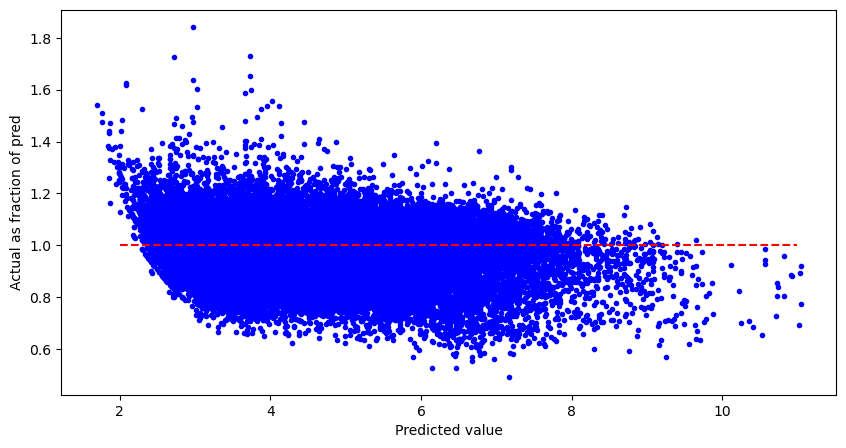

In [16]:
plt.figure(figsize=[10,5])
plt.plot(data['Value_ln_pred'], data['Value_ln']/data['Value_ln_pred'], 'b.')
plt.plot([2,11],[1,1],'r--')
plt.xlabel('Predicted value')
plt.ylabel('Actual as fraction of pred')
plt.show()